In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from data1 import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

A:\Python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T



print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 360
number of test examples = 80
X_train shape: (360, 256, 256, 3)
Y_train shape: (360, 1)
X_test shape: (80, 256, 256, 3)
Y_test shape: (80, 1)


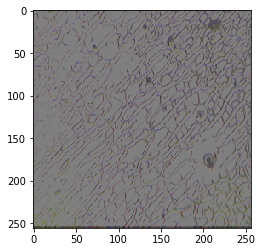

In [5]:
index = 5
plt.imshow(X_train_orig[index])

In [14]:

def MsModel(input_shape):

    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (2, 2), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool')(X)
    
    X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((4, 4), name='max_pool1')(X)
    
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((4, 4), name='max_pool2')(X)
    
   

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. 
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    
    
    
    
    
    return model

In [15]:
msModel = MsModel((256,256,3))


In [16]:
msModel.compile(loss='mean_squared_error', optimizer='Adam', metrics = ["accuracy"])

In [17]:
msModel.fit(x=X_train, y = Y_train, epochs = 30 , batch_size = 12)

Epoch 1/30
360/360 [==============================] - 48s 134ms/step - loss: 0.2021 - acc: 0.6944
Epoch 2/30
360/360 [==============================] - 47s 131ms/step - loss: 0.1366 - acc: 0.8056
Epoch 3/30
360/360 [==============================] - 47s 130ms/step - loss: 0.1262 - acc: 0.8333
Epoch 4/30
360/360 [==============================] - 47s 131ms/step - loss: 0.1120 - acc: 0.8556
Epoch 5/30
360/360 [==============================] - 47s 130ms/step - loss: 0.0848 - acc: 0.9000
Epoch 6/30
360/360 [==============================] - 47s 131ms/step - loss: 0.0619 - acc: 0.9444
Epoch 7/30
360/360 [==============================] - 49s 135ms/step - loss: 0.0562 - acc: 0.9556
Epoch 8/30
360/360 [==============================] - 56s 155ms/step - loss: 0.0632 - acc: 0.9333
Epoch 9/30
360/360 [==============================] - 48s 135ms/step - loss: 0.0795 - acc: 0.9000
Epoch 10/30
360/360 [==============================] - 47s 131ms/step - loss: 0.0568 - acc: 0.9333
Epoch 11/30
360/360